# Практична робота №3
## Варіант 2
**Опис Компанії-Замовника:** Scott Polar Research Institute (SPRI) -  Британський інститут, що є частиною Кембриджського університету, який займається всесторонніми дослідженнями полярних регіонів.\
***---------------------------------------------***\
**Запит:** Організація потребує розробки алгоритму, здатного класифікувати різні види пінгвінів на основі зібраних даних, щоб поліпшити розуміння різноманіття та розподілу цих видів у регіоні.\
***---------------------------------------------***\
**Пропозиція Реалізації:** Створення моделі машинного навчання для класифікації видів пінгвінів. Модель повинна враховувати різні фізичні характеристики, такі як розміри тіла, маса та гендерні особливості, для точного визначення виду кожного пінгвіна. Ця класифікація допоможе визначити основні видові групи пінгвінів у регіоні та їх розподіл, сприяючи кращому збереженню цих видів та розумінню їхнього екологічного статусу.**

## Завдання
1) Виберіть техніку моделювання для вирішення проблеми вашого підприємства.
2) Складіть звіт моделювання та опишіть припущення для обраних моделей.
3) Виберіть декілька метрик для ваших моделей з  попередньої практичної та обґрунтуйте свій вибір.
4) Виберіть метод поділу даних на навчальні та тестові. Опишіть основи такого рішення.
5) Здійсніть тренування обраних моделей на даних вашого підприємства.
6) Здійсніть валідацію моделей на основі обраних метрик та поділу даних.
7) Оберіть найкращу модель.


## Підготовка роботи ##

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from sklearn import metrics
import lightgbm
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [2]:
ds = pd.read_csv("variant_2_updated.csv")
ds_original = pd.read_csv("variant_2.csv")

***Перевіримо чи не пошкоджений файл***

In [3]:
ds['Species'].value_counts()

Species
1    151
2    151
0    150
Name: count, dtype: int64

In [4]:
ds_original['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Chinstrap penguin (Pygoscelis antarctica)    152
Gentoo penguin (Pygoscelis papua)            152
Name: count, dtype: int64

In [5]:
ds.head(5)

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
0,0,708,0,0,0.0,1,3,1,111107,0.254545,0.666667,0.152542,0.291667,0,0.000000,0.000000,0.333333,0
1,1,708,1,0,0.0,1,2,1,111107,0.269091,0.511905,0.237288,0.305556,1,0.261814,0.719311,0.456140,0
2,2,708,2,0,1.0,1,2,1,111607,0.298182,0.583333,0.389831,0.152778,1,0.146275,0.521692,0.456140,0
3,3,708,3,0,1.0,1,4,1,111607,0.327273,0.464286,0.305085,0.305556,0,0.000000,0.000000,0.000000,0
4,4,708,4,0,0.0,1,1,1,111607,0.167273,0.738095,0.355932,0.208333,1,0.225434,0.524404,0.456140,0


### Здійснюємо поділ даних на тестові, навчальні та дані для валідації. А також обираємо декілька методик для моделювання і порівнюємо їх між собою
*** Для оцінки моделей обрано точність, Precision, Recall і F1-міру, оскільки вони враховують як загальну ефективність, так і збалансованість між правильними позитивними і негативними прогнозами.***

In [6]:
X = ds.drop(columns=['Species', 'Unnamed: 0', 'Sample Number', 'Individual ID', 'studyName', 'Comments'])
y = ds['Species']

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=0)

models = {
    "Logistic Regression": LogisticRegression(max_iter = 120),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(models, X_train, y_train, X_valid, y_valid, X_test, y_test):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)
        y_pred_test = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        valid_accuracy = accuracy_score(y_valid, y_pred_valid)
        test_accuracy = accuracy_score(y_test, y_pred_test)

        train_precision = precision_score(y_train, y_pred_train, average='weighted')
        valid_precision = precision_score(y_valid, y_pred_valid, average='weighted')
        test_precision = precision_score(y_test, y_pred_test, average='weighted')

        train_recall = recall_score(y_train, y_pred_train, average='weighted')
        valid_recall = recall_score(y_valid, y_pred_valid, average='weighted')
        test_recall = recall_score(y_test, y_pred_test, average='weighted')

        train_f1 = f1_score(y_train, y_pred_train, average='weighted')
        valid_f1 = f1_score(y_valid, y_pred_valid, average='weighted')
        test_f1 = f1_score(y_test, y_pred_test, average='weighted')

        results[name] = {
            "Train Accuracy": train_accuracy,
            "Valid Accuracy": valid_accuracy,
            "Test Accuracy": test_accuracy,
            "Train Precision": train_precision,
            "Valid Precision": valid_precision,
            "Test Precision": test_precision,
            "Train Recall": train_recall,
            "Valid Recall": valid_recall,
            "Test Recall": test_recall,
            "Train F1": train_f1,
            "Valid F1": valid_f1,
            "Test F1": test_f1
        }

    return results


In [7]:
results = train_and_evaluate(models, X_train, y_train, X_valid, y_valid, X_test, y_test)

results_df = pd.DataFrame(results).T
results_df.index.name = "Модель"
print(results_df)


                        Train Accuracy  Valid Accuracy  Test Accuracy  \
Модель                                                                  
Logistic Regression           0.977839        1.000000       1.000000   
Decision Tree                 1.000000        1.000000       1.000000   
Random Forest                 1.000000        1.000000       1.000000   
Support Vector Machine        0.481994        0.488889       0.456522   
Gradient Boosting             1.000000        1.000000       1.000000   

                        Train Precision  Valid Precision  Test Precision  \
Модель                                                                     
Logistic Regression            0.978817         1.000000        1.000000   
Decision Tree                  1.000000         1.000000        1.000000   
Random Forest                  1.000000         1.000000        1.000000   
Support Vector Machine         0.366129         0.339506        0.305492   
Gradient Boosting              1

***Проаналізувавши результати, оберемо модель Logistic Regression як найкращий варіант, оскільки вона не перенавчена і забезпечує стабільні результати***

### Важливість ознак у моделюванні Logistic Regression

                Feature  Importance
5    Culmen Length (mm)    2.909230
6     Culmen Depth (mm)    2.226637
7   Flipper Length (mm)    1.891804
11    Delta 13 C (o/oo)    1.394212
2                 Stage    1.305594
1                Island    1.169668
8         Body Mass (g)    1.042343
3     Clutch Completion    0.691673
9                   Sex    0.293649
10    Delta 15 N (o/oo)    0.224681
4              Date Egg    0.000003
0                Region    0.000000


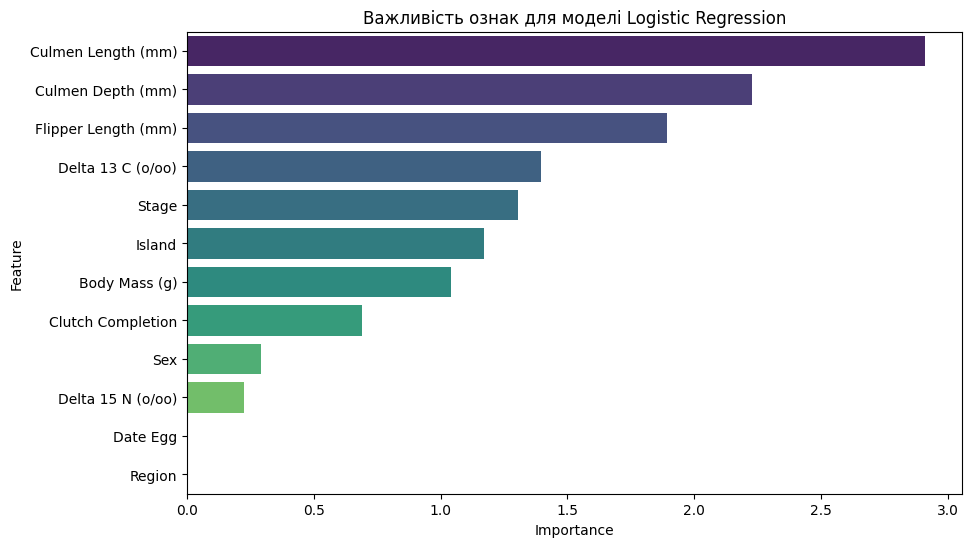

In [8]:
logreg_model = models["Logistic Regression"]
logreg_model.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg_model.coef_[0])
})


feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Важливість ознак для моделі Logistic Regression')
plt.show()

### Висновок: 
***Виконавши практичну роботу, я навчився підбирати модель машинного навчання в залежності від задачі, що стоїть переді мною, на основі метрик, що різними способами вимірюють точність нашої моделі.***